In [13]:
import math as ma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as sta
from scipy import stats
from sklearn.linear_model import LinearRegression

In [6]:
students = pd.read_csv('./Student_Marks.csv')
students.head()

,Time Study,Marks
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299


In [11]:
time_study, marks = students['Time Study'], students['Marks']
data_length = len(students) #the length of the database

def round_array(arr):
    return [round(x, 2) for x in arr]

time_study = round_array(time_study)
marks = round_array(marks)


In [25]:
#1

# 
confidence_level = 0.05

def upper_confidence_bound(n, mean, stadard_deviation, z_alpha_divide_2):
    return mean + z_alpha_divide_2 * stadard_deviation / ma.sqrt(n)

def lower_confidence_bound(n, mean, stadard_deviation, z_alpha_divide_2):
    return mean - z_alpha_divide_2 * stadard_deviation / ma.sqrt(n)
z_alpha = stats.norm.ppf(1-confidence_level)
z_alpha_divide_2 = stats.norm.ppf(1-confidence_level/2)


In [57]:

## Confidence interval for the mean of Marks & Time Study
ts_length = len(time_study)
ts_mean = sta.mean(time_study)
ts_standard_deviation = sta.stdev(time_study)
print(lower_confidence_bound(ts_length, ts_mean, ts_standard_deviation, z_alpha_divide_2), " <= mean (Time Study) <=", upper_confidence_bound(ts_length, ts_mean, ts_standard_deviation, z_alpha_divide_2))

m_length = len(marks)
m_mean = sta.mean(marks)
m_standard_deviation = sta.stdev(marks)
print(lower_confidence_bound(m_length, m_mean, m_standard_deviation, z_alpha_divide_2), " <= mean (Marks) <=", upper_confidence_bound(m_length, m_mean, m_standard_deviation, z_alpha_divide_2))

3.6119801738236013  <= mean (Time Study) <= 4.542019826176398
21.60955458142466  <= mean (Marks) <= 27.22544541857534


In [58]:
#Hypothese testing

    ##Test the time study rate not exceed 5 hours a day
        ### H0: p=5 | H1:p<5
p0 = 5
Z0=(ts_mean - p0) / (ts_standard_deviation/ma.sqrt(m_length))
print(Z0, -z_alpha)
print("Z0 < Z_alpha => Reject H0")

-3.8902572662444586 -1.6448536269514722
Z0 < Z_alpha => Reject H0


In [59]:
#Hypothese testing

    ##Test the mark rate at least 32 per exam (Max score = 60)
        ### H0: p=32 | H1:p>32
p0 = 32
Z0=(m_mean - p0) / (m_standard_deviation/ma.sqrt(m_length))
print(Z0, z_alpha)
print("Z0 < - Z_alpha =>Fail Reject H0")

-5.2926338291558235 1.6448536269514722
Z0 < Z_alpha =>Fail Reject H0


In [68]:
#Tests on a Population Proportion.

    ##Test at least 10% students have marks > 30. A sample of 100 students revealed that 42 students have marks > 30
        ### H0: p=0.1 | H1: p>0.1
p0=0.1
x= 42
Z0=(x-m_mean*p0)/ma.sqrt(m_mean*p0*(1-p0))
print(Z0, z_alpha)
print("Z0 > Z_alpha =>Reject H0")

26.68487777080344 1.6448536269514722
Z0 > Z_alpha =>Reject H0


In [76]:
#Tests on a Population Proportion.

    ##Test not exceed 80% students have time study > 6. A sample of 100 students revealed that 12 students have time study > 6
        ### H0: p=0.8 | H1: p<0.18
p0=0.8
x= 12
Z0=(x-m_mean*p0)/ma.sqrt(m_mean*p0*(1-p0))
print(Z0, -z_alpha)
print("Z0 < -Z_alpha => Reject H0")

-3.8116676507157146 -1.6448536269514722
Z0 < -Z_alpha => Reject H0


In [87]:
## Confidence interval for the proportion of Time Study

def upper_confidence_bound(p_, mean, z_alpha):
    return p_ + z_alpha * (ma.sqrt(p_ * (1 - p_) / mean))
  
def lower_confidence_bound(p_, mean, z_alpha):
    return p_ - z_alpha * (ma.sqrt(p_ * (1 - p_) / mean))

print(lower_confidence_bound(x/ts_length, ts_mean, z_alpha),"<= proportion (Time Study) <=",upper_confidence_bound(x/ts_length, ts_mean, z_alpha))

-0.1447212837037068 <= proportion (Time Study) <= 0.3847212837037068


In [89]:
## Confidence interval for the proportion of Marks

print(lower_confidence_bound(x/m_length, m_mean, z_alpha),"<= proportion (Marks) <=",upper_confidence_bound(x/m_length, m_mean, z_alpha))

0.011829554663526476 <= proportion (Marks) <= 0.22817044533647352


Text(0, 0.5, 'Marks')

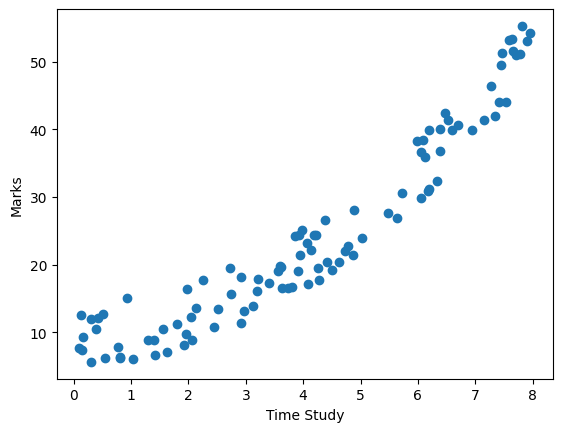

In [84]:
#5b
plt.scatter(time_study, marks)
plt.xlabel("Time Study")
plt.ylabel("Marks")

In [80]:
#5c
np.corrcoef(time_study, marks)

array([[1.        , 0.94231919],
       [0.94231919, 1.        ]])

In [81]:
#5d
# Example data (replace with your actual data)
X = time_study  # Independent variable
Y = marks  # Dependent variable

# Create a linear regression model
model = LinearRegression()
model.fit(np.array(X).reshape(-1, 1), Y)  # Reshape X to a 2D array

# Get the coefficients (intercept and slope)
intercept = model.intercept_
slope = model.coef_[0]

# Equation of the regression line: Y = intercept + slope * X
equation = f"Y = {intercept:.2f} + {slope:.2f} * X"

# Predict a future value for Y (e.g., at X = 6)
future_X = np.array([6]).reshape(-1, 1)
predicted_Y = model.predict(future_X)[0]

print("Regression Equation:", equation)
print(f"Predicted Y at X = 6: {predicted_Y:.2f}")

Regression Equation: Y = 1.22 + 5.69 * X
Predicted Y at X = 6: 35.36
